In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)
n_samples = 200
bmi = np.random.normal(24, 4, n_samples)   # mean=24, std=4
X = bmi.reshape(-1, 1)

# Label: overweight if BMI >= 25
y = (bmi >= 25).astype(int)


In [31]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

# 3. Cross-validation on TRAIN data

model = LogisticRegression()
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print(f"\nCross-validation accuracies (k={k}): {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

# 4. Train on full TRAIN set and test on HOLD-OUT TEST set

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Train size: 160
Test size: 40

Cross-validation accuracies (k=5): [1.      1.      0.96875 1.      1.     ]
Mean CV accuracy: 0.994 (+/- 0.012)



Final Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



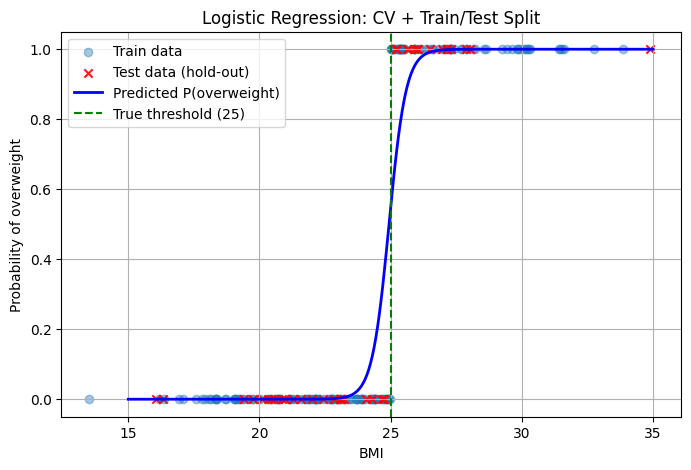

In [32]:
print("\nFinal Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Plot decision boundary

X_range = np.linspace(15, 35, 300).reshape(-1,1)
probs = model.predict_proba(X_range)[:,1]

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X_test, y_test, alpha=0.9, marker='x', color='red', label="Test data (hold-out)")
plt.plot(X_range, probs, color='blue', linewidth=2, label="Predicted P(overweight)")
plt.axvline(25, color='green', linestyle="--", label="True threshold (25)")
plt.xlabel("BMI")
plt.ylabel("Probability of overweight")
plt.title(f"Logistic Regression: CV + Train/Test Split")
plt.legend()
plt.grid(True)
plt.show()

Cross-validation accuracies (k=5): [1.    1.    0.975 1.    1.   ]
Mean accuracy: 0.995 (+/- 0.010)


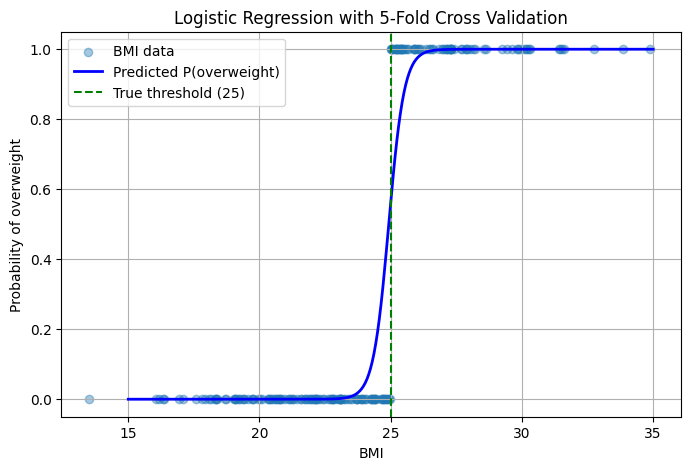

In [26]:


# K-Fold (Stratified to keep class balance in each fold)
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Cross-validation
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

print(f"Cross-validation accuracies (k={k}): {scores}")
print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")

# Fit once on full data for visualization
model.fit(X, y)

# Plot decision boundary
X_range = np.linspace(15, 35, 300).reshape(-1,1)
probs = model.predict_proba(X_range)[:,1]

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.4, label="BMI data")
plt.plot(X_range, probs, color='blue', linewidth=2, label="Predicted P(overweight)")
plt.axvline(25, color='green', linestyle="--", label="True threshold (25)")
plt.xlabel("BMI")
plt.ylabel("Probability of overweight")
plt.title(f"Logistic Regression with {k}-Fold Cross Validation")
plt.legend()
plt.grid(True)
plt.show()
